In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [2]:
data = pd.read_csv('cleveland_short.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   fbs       282 non-null    int64  
 6   restecg   282 non-null    int64  
 7   thalach   282 non-null    int64  
 8   exang     282 non-null    int64  
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    int64  
 11  ca        282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.0 KB


In [5]:
print("The shape of dataset: ", data.shape)

The shape of dataset:  (282, 14)


In [6]:
print("Displaying NA values in each columns: ")
data.isna().sum(axis=0)

Displaying NA values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
print("Displaying NULL values in each columns: ")
data.isnull().sum()

Displaying NULL values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
data = data.dropna()

data.shape

(282, 14)

In [9]:
data = data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
275,64,1,1,170,227,0,2,155,0,0.6,2,0,7,0
189,69,1,3,140,254,0,2,146,0,2.0,2,3,7,2
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
98,52,1,2,134,201,0,0,158,0,0.8,1,1,3,0
118,63,1,4,130,330,1,2,132,1,1.8,1,3,7,3


In [10]:
X_df = data.copy()
Y_df = X_df.pop('num')

print('X Values')
display(X_df)
print('Y Values')
display(Y_df)

print('Shape of X:', X_df.shape)
print('Shape of Y:', Y_df.shape)

X Values


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,64,1,1,170,227,0,2,155,0,0.6,2,0,7
189,69,1,3,140,254,0,2,146,0,2.0,2,3,7
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3
98,52,1,2,134,201,0,0,158,0,0.8,1,1,3
118,63,1,4,130,330,1,2,132,1,1.8,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,39,1,4,118,219,0,0,140,0,1.2,2,0,7
120,48,1,4,130,256,1,2,150,1,0.0,1,2,7
133,51,1,4,140,261,0,2,186,1,0.0,1,0,3
228,54,1,4,110,206,0,2,108,1,0.0,2,1,3


Y Values


275    0
189    2
19     0
98     0
118    3
      ..
109    3
120    3
133    0
228    3
83     3
Name: num, Length: 282, dtype: int64

Shape of X: (282, 13)
Shape of Y: (282,)


In [11]:
Y_labels = pd.get_dummies(Y_df, prefix='Label')

print('All Labels:')
display(Y_labels)

All Labels:


,Label_0,Label_1,Label_2,Label_3,Label_4
275,1,0,0,0,0
189,0,0,1,0,0
19,1,0,0,0,0
98,1,0,0,0,0
118,0,0,0,1,0
...,...,...,...,...,...
109,0,0,0,1,0
120,0,0,0,1,0
133,1,0,0,0,0
228,0,0,0,1,0


In [12]:
X_stats = X_df.describe()
X_stats = X_stats.transpose()
display(X_stats)

,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
restecg,282.0,1.014184,0.998118,0.0,0.00,2.0,2.00,2.0
thalach,282.0,149.765957,22.923869,71.0,133.25,153.5,165.75,202.0
exang,282.0,0.326241,0.469670,0.0,0.00,0.0,1.00,1.0
oldpeak,282.0,1.026950,1.138825,0.0,0.00,0.8,1.60,6.2


In [13]:
# Normalisation Steps

X_norm = (X_df - X_stats['mean'])/X_stats['std']

X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,1.059159,0.689021,-2.264087,2.164504,-0.431340,-0.417588,0.987674,0.228323,-0.694617,-0.374904,0.680488,-0.481639,1.075595
189,1.611457,0.689021,-0.170734,0.475077,0.095823,-0.417588,0.987674,-0.164281,-0.694617,0.854433,0.680488,1.943759,1.075595
19,-0.597735,0.689021,-1.217411,-0.088066,0.330117,-0.417588,-1.016097,0.926285,-0.694617,-0.374904,-0.959662,-0.481639,-0.703395
98,-0.266357,0.689021,-1.217411,0.137191,-0.938979,-0.417588,-1.016097,0.359191,-0.694617,-0.199285,-0.959662,0.326827,-0.703395
118,0.948699,0.689021,0.875942,-0.088066,1.579689,2.386215,0.987674,-0.774998,1.434536,0.678813,-0.959662,1.943759,1.075595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.702331,0.689021,0.875942,-0.763837,-0.587537,-0.417588,-1.016097,-0.426017,-0.694617,0.151955,0.680488,-0.481639,1.075595
120,-0.708195,0.689021,0.875942,-0.088066,0.134872,2.386215,0.987674,0.010210,1.434536,-0.901763,-0.959662,1.135293,1.075595
133,-0.376816,0.689021,0.875942,0.475077,0.232495,-0.417588,0.987674,1.580625,1.434536,-0.901763,-0.959662,-0.481639,-0.703395
228,-0.045437,0.689021,0.875942,-1.214351,-0.841356,-0.417588,0.987674,-1.821942,1.434536,-0.901763,0.680488,0.326827,-0.703395


In [14]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X_norm, Y_labels, test_size=0.2)

print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test_valid: ", x_test_valid.shape)
print("Size of y_test_valid: ", y_test_valid.shape)

print("X Train Data")
display(x_train.head())
print("Y Train Data")
display(y_train.head())
print("X Test Validation Data")
display(x_test_valid.head())
print("Y Test Validation Data")
display(y_test_valid.head())

Size of x_train:  (225, 13)
Size of y_train:  (225, 5)
Size of x_test_valid:  (57, 13)
Size of y_test_valid:  (57, 5)
X Train Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
190,-0.487276,0.689021,-0.170734,-0.144380,-1.036602,-0.417588,-1.016097,0.577304,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
246,0.396401,0.689021,0.875942,-1.777493,-0.294669,-0.417588,-1.016097,0.271945,-0.694617,-0.813953,-0.959662,0.326827,1.075595
205,-1.039574,0.689021,0.875942,0.587705,1.169673,-0.417588,0.987674,-0.120658,1.434536,-0.901763,0.680488,1.943759,1.075595
55,-0.045437,0.689021,0.875942,-0.425951,0.330117,-0.417588,0.987674,-1.778319,1.434536,1.030053,0.680488,0.326827,1.075595
58,-0.045437,0.689021,-0.170734,-0.369637,0.466789,-0.417588,0.987674,0.097455,-0.694617,-0.462714,2.320637,0.326827,-0.703395


Y Train Data


,Label_0,Label_1,Label_2,Label_3,Label_4
190,1,0,0,0,0
246,0,0,1,0,0
205,0,0,0,1,0
55,0,1,0,0,0
58,1,0,0,0,0


X Test Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
44,0.727780,-1.446187,0.875942,-0.088066,1.579689,-0.417588,0.987674,0.839040,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
116,0.396401,0.689021,-0.170734,0.475077,-0.743733,2.386215,0.987674,0.664549,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
247,-0.818655,0.689021,0.875942,-1.214351,0.505838,-0.417588,0.987674,-1.385715,1.434536,-0.023665,0.680488,0.326827,-0.703395
156,-0.376816,0.689021,0.875942,0.475077,0.974428,-0.417588,-1.016097,1.013531,1.434536,0.503194,-0.959662,-0.481639,1.075595
146,0.285942,0.689021,0.875942,1.882933,0.779182,2.386215,0.987674,-1.123979,-0.694617,-0.023665,0.680488,1.943759,1.075595


Y Test Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
44,0,1,0,0,0
116,1,0,0,0,0
247,0,1,0,0,0
156,0,1,0,0,0
146,0,0,0,0,1


In [15]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=0.5)

print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)
print("Size of x_valid: ", x_valid.shape)
print("Size of y_valid: ", y_valid.shape)

print("X Test Data")
display(x_test.head())
print("Y Test Data")
display(y_test.head())
print("X Validation Data")
display(x_valid.head())
print("Y Validation Data")
display(y_valid.head())

Size of x_test:  (28, 13)
Size of y_test:  (28, 5)
Size of x_valid:  (29, 13)
Size of y_valid:  (29, 5)
X Test Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
147,-1.481412,0.689021,-0.170734,-1.101722,0.017724,-0.417588,-1.016097,1.275267,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
154,1.059159,0.689021,0.875942,-0.651208,-0.060374,-0.417588,0.987674,-2.345414,1.434536,1.030053,2.320637,0.326827,-0.703395
279,0.396401,-1.446187,0.875942,-0.088066,-1.017077,-0.417588,-1.016097,-0.818621,-0.694617,-0.374904,0.680488,-0.481639,-0.703395
164,-0.708195,0.689021,-0.170734,-0.425951,0.115347,2.386215,-1.016097,1.100776,-0.694617,-0.901763,-0.959662,1.135293,-0.703395
235,-0.045437,0.689021,0.875942,-0.538580,0.720609,-0.417588,0.987674,-1.472961,1.434536,1.908151,0.680488,1.135293,-0.703395


Y Test Data


,Label_0,Label_1,Label_2,Label_3,Label_4
147,1,0,0,0,0
154,0,0,0,1,0
279,1,0,0,0,0
164,1,0,0,0,0
235,0,0,0,1,0


X Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
28,-1.260493,0.689021,0.875942,1.038219,-0.040849,-0.417588,-1.016097,0.926285,-0.694617,0.415384,-0.959662,-0.481639,-0.703395
27,1.280078,-1.446187,-2.264087,1.038219,-0.450865,-0.417588,-1.016097,-1.560206,-0.694617,1.381292,2.320637,-0.481639,-0.703395
160,-0.929114,0.689021,-1.217411,-1.721179,-1.017077,2.386215,-1.016097,0.271945,-0.694617,-0.901763,-0.959662,-0.481639,1.075595
137,0.838240,0.689021,-1.217411,-0.651208,0.622986,-0.417588,0.987674,-2.040055,-0.694617,0.327574,0.680488,0.326827,1.075595
133,-0.376816,0.689021,0.875942,0.475077,0.232495,-0.417588,0.987674,1.580625,1.434536,-0.901763,-0.959662,-0.481639,-0.703395


Y Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
28,1,0,0,0,0
27,1,0,0,0,0
160,1,0,0,0,0
137,0,0,0,1,0
133,1,0,0,0,0


## Training Our Models

In [16]:
def build_base_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu', input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

base_model = build_base_model()
print('Base Model Summary:')
base_model.summary()


with tf.device('/CPU:0'):
    history = base_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )



Base Model Summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 1s 14ms/step - loss: 1.6027 - accuracy: 0.5364 - val_loss: 1.5918 - val_accuracy: 0.6207
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.5826 - accuracy: 0.5581 - val_loss: 1.5639 - val_accuracy: 0.6207
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.5484 - 

22/22 [==============================] - 0s 6ms/step - loss: 0.8934 - accuracy: 0.6233 - val_loss: 0.8739 - val_accuracy: 0.5862
Epoch 54/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8759 - accuracy: 0.6326 - val_loss: 0.8755 - val_accuracy: 0.5862
Epoch 55/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8748 - accuracy: 0.6326 - val_loss: 0.8768 - val_accuracy: 0.5862
Epoch 56/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8914 - accuracy: 0.6233 - val_loss: 0.8783 - val_accuracy: 0.5862
Epoch 57/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8834 - accuracy: 0.6233 - val_loss: 0.8804 - val_accuracy: 0.5862
Epoch 58/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8937 - accuracy: 0.6233 - val_loss: 0.8819 - val_accuracy: 0.5862
Epoch 59/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8668 - accuracy: 0.6372 - val_loss: 0.8832 - val_accuracy: 0.5862
Epoch 60/1000

22/22 [==============================] - 0s 4ms/step - loss: 0.8085 - accuracy: 0.6372 - val_loss: 0.9547 - val_accuracy: 0.5862
Epoch 111/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7947 - accuracy: 0.6372 - val_loss: 0.9560 - val_accuracy: 0.5862
Epoch 112/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8039 - accuracy: 0.6419 - val_loss: 0.9569 - val_accuracy: 0.5862
Epoch 113/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8118 - accuracy: 0.6372 - val_loss: 0.9579 - val_accuracy: 0.5862
Epoch 114/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8301 - accuracy: 0.6233 - val_loss: 0.9593 - val_accuracy: 0.5862
Epoch 115/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.6465 - val_loss: 0.9597 - val_accuracy: 0.5862
Epoch 116/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.6318 - val_loss: 0.9613 - val_accuracy: 0.5862
Epoch 1

Epoch 167/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7467 - accuracy: 0.6651 - val_loss: 1.0409 - val_accuracy: 0.5862
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7713 - accuracy: 0.6465 - val_loss: 1.0425 - val_accuracy: 0.5862
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7572 - accuracy: 0.6605 - val_loss: 1.0446 - val_accuracy: 0.5862
Epoch 170/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7684 - accuracy: 0.6558 - val_loss: 1.0477 - val_accuracy: 0.5862
Epoch 171/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7711 - accuracy: 0.6512 - val_loss: 1.0493 - val_accuracy: 0.5862
Epoch 172/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7668 - accuracy: 0.6558 - val_loss: 1.0509 - val_accuracy: 0.5862
Epoch 173/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7782 - accuracy: 0.6512 - val_loss: 1.0540 - val_accuracy:

Epoch 224/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7171 - accuracy: 0.6977 - val_loss: 1.1775 - val_accuracy: 0.5862
Epoch 225/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.7023 - val_loss: 1.1821 - val_accuracy: 0.5862
Epoch 226/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.6977 - val_loss: 1.1816 - val_accuracy: 0.5862
Epoch 227/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.6930 - val_loss: 1.1874 - val_accuracy: 0.5862
Epoch 228/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.6977 - val_loss: 1.1832 - val_accuracy: 0.5862
Epoch 229/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7345 - accuracy: 0.6791 - val_loss: 1.1884 - val_accuracy: 0.5862
Epoch 230/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.6977 - val_loss: 1.1891 - val_accuracy:

22/22 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.7302 - val_loss: 1.3318 - val_accuracy: 0.5862
Epoch 281/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7256 - val_loss: 1.3348 - val_accuracy: 0.5862
Epoch 282/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7349 - val_loss: 1.3382 - val_accuracy: 0.5862
Epoch 283/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.7256 - val_loss: 1.3433 - val_accuracy: 0.5862
Epoch 284/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.7349 - val_loss: 1.3456 - val_accuracy: 0.5862
Epoch 285/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.7256 - val_loss: 1.3516 - val_accuracy: 0.5862
Epoch 286/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.7256 - val_loss: 1.3596 - val_accuracy: 0.5517
Epoch 2

Epoch 337/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.7488 - val_loss: 1.5463 - val_accuracy: 0.5172
Epoch 338/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.7395 - val_loss: 1.5613 - val_accuracy: 0.5172
Epoch 339/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.7442 - val_loss: 1.5648 - val_accuracy: 0.5172
Epoch 340/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.7535 - val_loss: 1.5720 - val_accuracy: 0.5517
Epoch 341/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.7488 - val_loss: 1.5719 - val_accuracy: 0.5172
Epoch 342/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.7442 - val_loss: 1.5843 - val_accuracy: 0.5172
Epoch 343/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.7535 - val_loss: 1.5765 - val_accuracy:

Epoch 394/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7488 - val_loss: 1.7921 - val_accuracy: 0.5172
Epoch 395/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7535 - val_loss: 1.7964 - val_accuracy: 0.4828
Epoch 396/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7535 - val_loss: 1.8044 - val_accuracy: 0.4828
Epoch 397/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.7581 - val_loss: 1.8046 - val_accuracy: 0.4828
Epoch 398/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7535 - val_loss: 1.8030 - val_accuracy: 0.4828
Epoch 399/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.7535 - val_loss: 1.8041 - val_accuracy: 0.5172
Epoch 400/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.7442 - val_loss: 1.8079 - val_accuracy:

Epoch 451/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.7581 - val_loss: 2.0461 - val_accuracy: 0.5517
Epoch 452/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7581 - val_loss: 2.0582 - val_accuracy: 0.5517
Epoch 453/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.7535 - val_loss: 2.0629 - val_accuracy: 0.5517
Epoch 454/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.7581 - val_loss: 2.0567 - val_accuracy: 0.5517
Epoch 455/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5578 - accuracy: 0.7674 - val_loss: 2.0768 - val_accuracy: 0.5517
Epoch 456/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5610 - accuracy: 0.7628 - val_loss: 2.0879 - val_accuracy: 0.5517
Epoch 457/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5664 - accuracy: 0.7581 - val_loss: 2.0768 - val_accuracy:

22/22 [==============================] - 0s 4ms/step - loss: 0.5525 - accuracy: 0.7545 - val_loss: 2.3131 - val_accuracy: 0.5172
Epoch 508/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7674 - val_loss: 2.3055 - val_accuracy: 0.5172
Epoch 509/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5477 - accuracy: 0.7535 - val_loss: 2.3210 - val_accuracy: 0.5172
Epoch 510/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.7535 - val_loss: 2.3195 - val_accuracy: 0.5172
Epoch 511/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.7581 - val_loss: 2.3272 - val_accuracy: 0.5172
Epoch 512/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.7581 - val_loss: 2.3366 - val_accuracy: 0.5172
Epoch 513/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.7581 - val_loss: 2.3482 - val_accuracy: 0.5172
Epoch 5

Epoch 564/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.5301 - accuracy: 0.7814 - val_loss: 2.6204 - val_accuracy: 0.5172
Epoch 565/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5240 - accuracy: 0.7767 - val_loss: 2.6419 - val_accuracy: 0.5172
Epoch 566/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7814 - val_loss: 2.6566 - val_accuracy: 0.5172
Epoch 567/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5047 - accuracy: 0.7907 - val_loss: 2.6633 - val_accuracy: 0.5172
Epoch 568/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5240 - accuracy: 0.7814 - val_loss: 2.6552 - val_accuracy: 0.5172
Epoch 569/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5198 - accuracy: 0.7860 - val_loss: 2.6703 - val_accuracy: 0.5172
Epoch 570/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.7953 - val_loss: 2.6689 - val_accuracy:

Epoch 621/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8000 - val_loss: 2.9346 - val_accuracy: 0.5862
Epoch 622/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.8000 - val_loss: 2.9293 - val_accuracy: 0.5862
Epoch 623/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7953 - val_loss: 2.9409 - val_accuracy: 0.5862
Epoch 624/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8000 - val_loss: 2.9373 - val_accuracy: 0.5862
Epoch 625/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.8093 - val_loss: 2.9091 - val_accuracy: 0.5862
Epoch 626/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.8140 - val_loss: 2.9404 - val_accuracy: 0.5862
Epoch 627/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4838 - accuracy: 0.8093 - val_loss: 2.9573 - val_accuracy:

Epoch 678/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8093 - val_loss: 3.3185 - val_accuracy: 0.5862
Epoch 679/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.8047 - val_loss: 3.3309 - val_accuracy: 0.5862
Epoch 680/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.8000 - val_loss: 3.3269 - val_accuracy: 0.5862
Epoch 681/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.8047 - val_loss: 3.3350 - val_accuracy: 0.5862
Epoch 682/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.4628 - accuracy: 0.8140 - val_loss: 3.3375 - val_accuracy: 0.5862
Epoch 683/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.8093 - val_loss: 3.3608 - val_accuracy: 0.5862
Epoch 684/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.8000 - val_loss: 3.3855 - val_accuracy:

Epoch 735/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4899 - accuracy: 0.7953 - val_loss: 3.7339 - val_accuracy: 0.5862
Epoch 736/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4629 - accuracy: 0.8047 - val_loss: 3.7232 - val_accuracy: 0.5862
Epoch 737/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8091 - val_loss: 3.7268 - val_accuracy: 0.5862
Epoch 738/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8000 - val_loss: 3.7438 - val_accuracy: 0.5862
Epoch 739/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.8093 - val_loss: 3.7382 - val_accuracy: 0.5862
Epoch 740/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8140 - val_loss: 3.7416 - val_accuracy: 0.5862
Epoch 741/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8186 - val_loss: 3.7418 - val_accuracy:

Epoch 792/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.8093 - val_loss: 4.1273 - val_accuracy: 0.5862
Epoch 793/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8047 - val_loss: 4.1393 - val_accuracy: 0.5862
Epoch 794/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8047 - val_loss: 4.1642 - val_accuracy: 0.5862
Epoch 795/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7953 - val_loss: 4.1738 - val_accuracy: 0.5862
Epoch 796/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.8047 - val_loss: 4.1560 - val_accuracy: 0.5862
Epoch 797/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4439 - accuracy: 0.8093 - val_loss: 4.1531 - val_accuracy: 0.5862
Epoch 798/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8047 - val_loss: 4.1356 - val_accuracy:

Epoch 849/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8140 - val_loss: 4.4075 - val_accuracy: 0.5862
Epoch 850/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.8000 - val_loss: 4.3832 - val_accuracy: 0.5862
Epoch 851/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.4478 - accuracy: 0.8140 - val_loss: 4.3879 - val_accuracy: 0.5862
Epoch 852/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8136 - val_loss: 4.3883 - val_accuracy: 0.5862
Epoch 853/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8093 - val_loss: 4.4190 - val_accuracy: 0.5862
Epoch 854/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.8140 - val_loss: 4.4257 - val_accuracy: 0.5517
Epoch 855/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8233 - val_loss: 4.4418 - val_accuracy:

Epoch 906/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.8093 - val_loss: 4.6698 - val_accuracy: 0.5172
Epoch 907/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4460 - accuracy: 0.8140 - val_loss: 4.6663 - val_accuracy: 0.5172
Epoch 908/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.8093 - val_loss: 4.6635 - val_accuracy: 0.5172
Epoch 909/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.4510 - accuracy: 0.8093 - val_loss: 4.6835 - val_accuracy: 0.5172
Epoch 910/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8047 - val_loss: 4.7066 - val_accuracy: 0.5172
Epoch 911/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8047 - val_loss: 4.6896 - val_accuracy: 0.5517
Epoch 912/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.8140 - val_loss: 4.6834 - val_accuracy:

Epoch 963/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8279 - val_loss: 4.9751 - val_accuracy: 0.5517
Epoch 964/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8233 - val_loss: 4.9740 - val_accuracy: 0.5517
Epoch 965/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8093 - val_loss: 4.9601 - val_accuracy: 0.5517
Epoch 966/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8186 - val_loss: 4.9548 - val_accuracy: 0.5517
Epoch 967/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8182 - val_loss: 4.9720 - val_accuracy: 0.5517
Epoch 968/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8140 - val_loss: 4.9678 - val_accuracy: 0.5517
Epoch 969/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8186 - val_loss: 4.9850 - val_accuracy:

In [20]:
print('Summary of the base model results after each epoch: ')
base_hist = pd.DataFrame(history.history)
base_hist['epoch'] = history.epoch
base_hist.tail()

Summary of the base model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.366599,0.851163,23.822247,0.62069,995
996,0.386747,0.827907,23.764275,0.62069,996
997,0.367479,0.851163,23.793682,0.62069,997
998,0.376701,0.837209,23.828663,0.62069,998
999,0.370150,0.846512,23.800749,0.62069,999


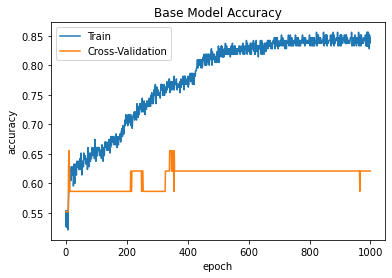

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

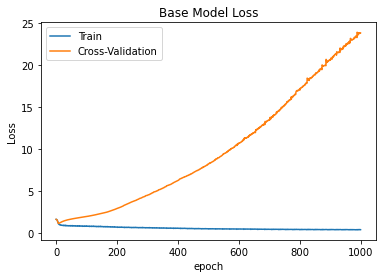

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [20]:
print('Train Split: ')
loss, accuracy = base_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8533
Accuracy   :  0.85 


In [21]:
print('Evaluation Split: ')
loss, accuracy =  base_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 5.8121 - accuracy: 0.5172
Accuracy   :  0.52 


In [22]:
print('Test Split: ')
loss, accuracy =  base_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 14.7306 - accuracy: 0.5714
Accuracy   :  0.57


array([[13,  1,  1,  2,  0],
       [ 2,  1,  1,  0,  0],
       [ 1,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0],
       [ 1,  0,  0,  2,  0]], dtype=int64)

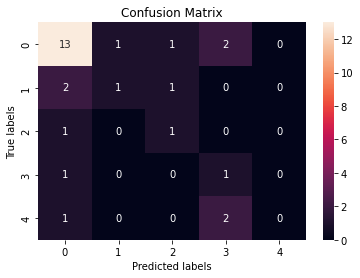

In [25]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = base_model.predict(x_test)

predict_results = predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 